In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("Heart_Disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.isnull().values.any()


False

In [4]:
data.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


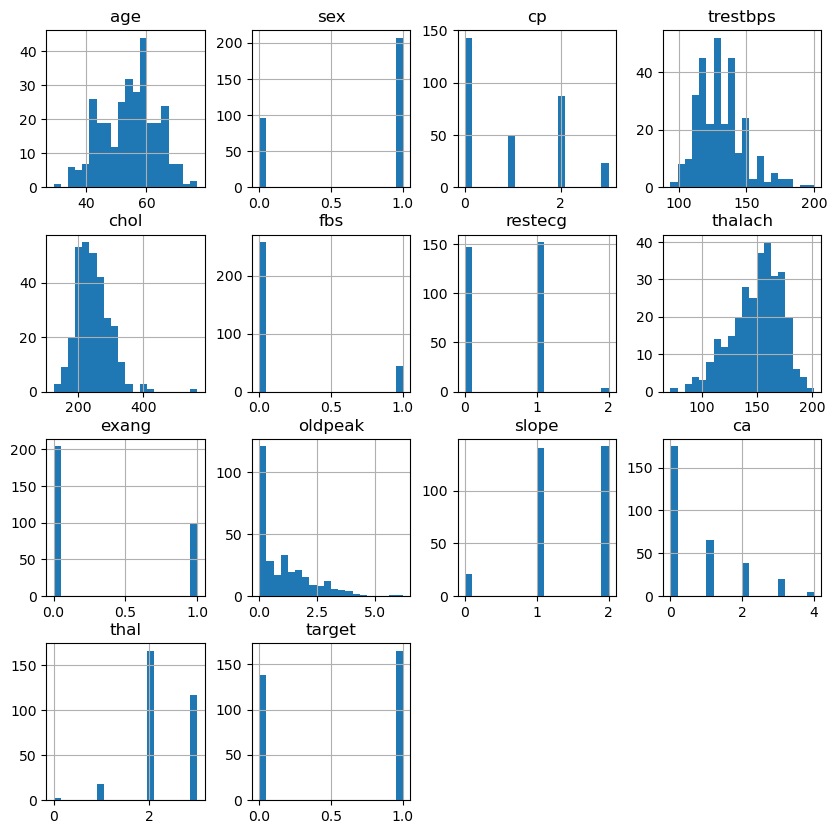

In [6]:
data.hist(bins=20,figsize=(10,10))
plt.show()

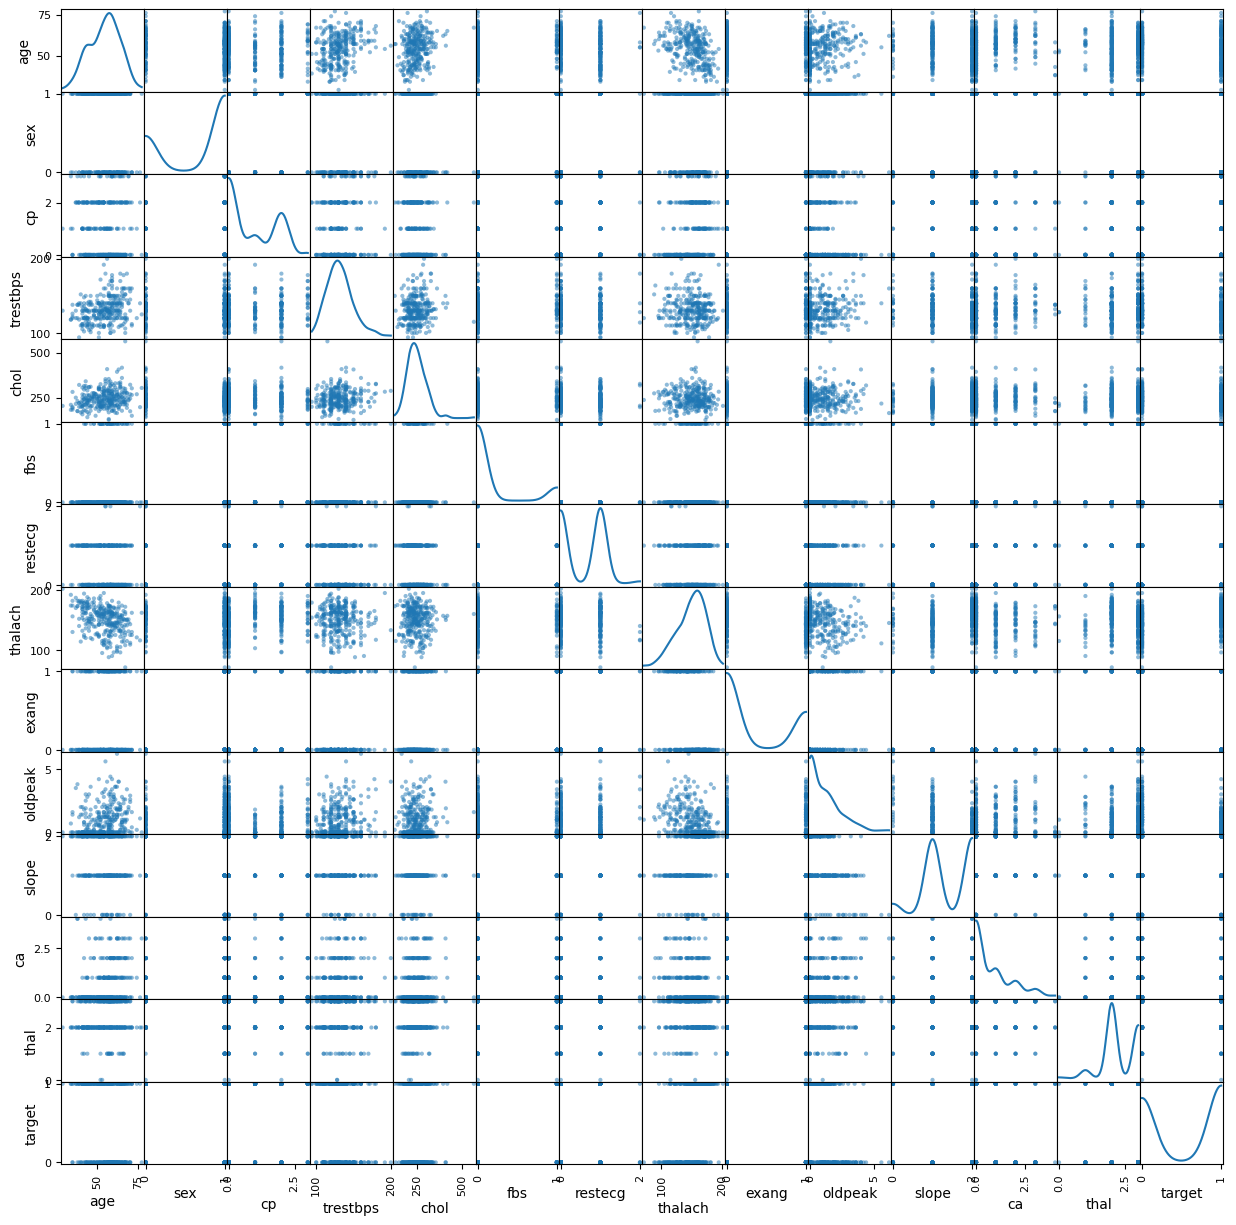

In [7]:
pd.plotting.scatter_matrix(data,figsize=(15,15),diagonal ='kde')
plt.show()

<AxesSubplot:>

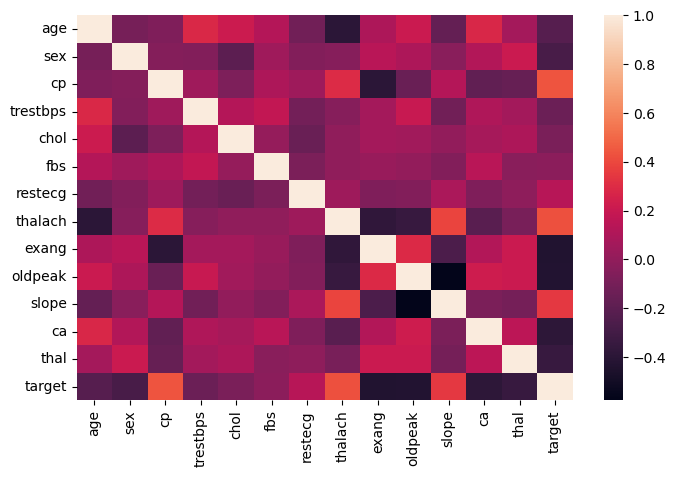

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr())


<AxesSubplot:>

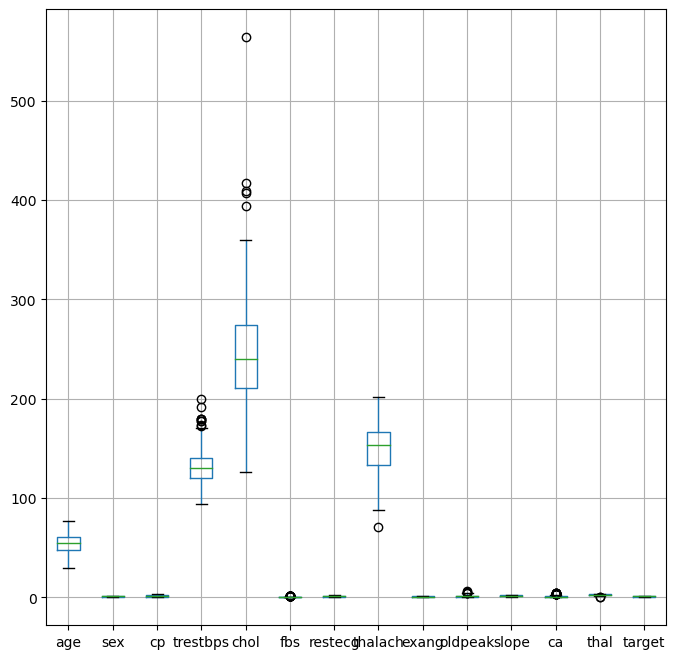

In [9]:
data.boxplot(figsize=(8,8))


<AxesSubplot:xlabel='chol', ylabel='age'>

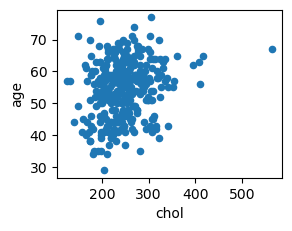

In [10]:
ax=plt.subplot(2,2,1)
data.plot(kind='scatter',y='age',x='chol',ax=ax)

<AxesSubplot:xlabel='thalach', ylabel='age'>

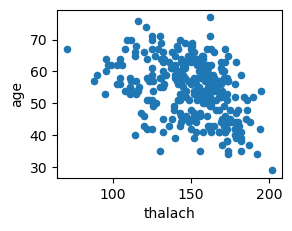

In [11]:
ax=plt.subplot(2,2,2)
data.plot(kind='scatter',y='age',x='thalach',ax=ax)

<AxesSubplot:xlabel='thalach', ylabel='chol'>

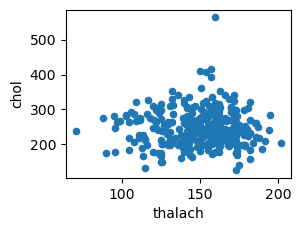

In [12]:
ax=plt.subplot(2,2,3)
data.plot(kind='scatter',y='chol',x='thalach',ax=ax)

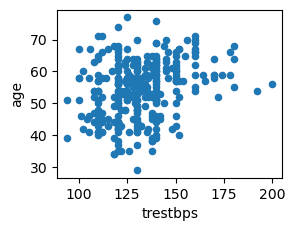

In [13]:
ax=plt.subplot(2,2,4)
data.plot(kind='scatter',y='age',x='trestbps',ax=ax)
plt.show()

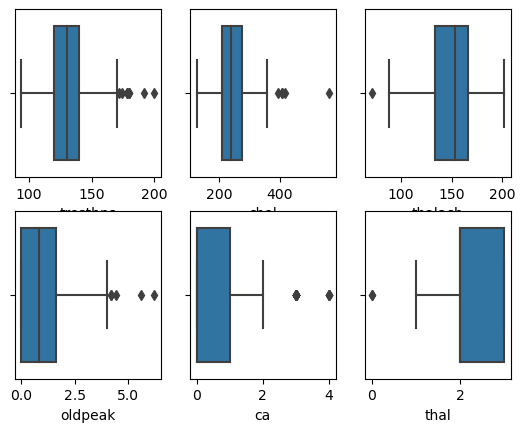

In [14]:
ax=plt.subplot(2,3,1)
sns.boxplot(x=data['trestbps'])

ax=plt.subplot(2,3,2)
sns.boxplot(x=data['chol'])

ax=plt.subplot(2,3,3)
sns.boxplot(x=data['thalach'])

ax=plt.subplot(2,3,4)
sns.boxplot(x=data['oldpeak'])

ax=plt.subplot(2,3,5)
sns.boxplot(x=data['ca'])

ax=plt.subplot(2,3,6)
sns.boxplot(x=data['thal'])

plt.show()

In [15]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

print((data < (Q1 - 1.5 * IQR))|(data > (Q3 + 1.5 * IQR)))

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64
       age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False   True    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
298  False  False  False     False  False  False    False    False  False   
299  False  False  False     False  False  False    False    False  False   
300  False  False  False     False  False   True    Fa

In [16]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,data_out.shape

((303, 14), (228, 14))

In [17]:
X=data_out.drop(columns=['target'])
y=data_out['target']

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((193, 13), (35, 13), (193,), (35,))

# Support Vector Machine Classifier


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC


In [2]:
data = pd.read_csv('heart_disease.csv')


In [3]:
X = data.drop('target', axis=1)
y = data['target']


In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = SVC(kernel='rbf')


In [7]:
model.fit(X_train, y_train)


SVC()

In [8]:
y_pred = model.predict(X_test)


In [9]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.9


In [10]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.84375


In [11]:
f_measure = f1_score(y_test, y_pred)
print("F-Measure:", f_measure)

F-Measure: 0.870967741935484


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8688524590163934


# Gradient Boosting Classifier


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
data = pd.read_csv('heart_disease.csv')


In [15]:
X = data.drop('target', axis=1)
y = data['target']

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = GradientBoostingClassifier()


In [19]:
model.fit(X_train, y_train)


GradientBoostingClassifier()

In [20]:
y_pred = model.predict(X_test)


In [21]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.8064516129032258


In [22]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 0.78125


In [23]:
f_measure = f1_score(y_test, y_pred)
print("F-Measure:", f_measure)

F-Measure: 0.7936507936507936


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7868852459016393


# Naive Bayes


In [24]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))

Accuracy score 0.9428571428571428
ROC AUC score 0.9337121212121212


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [26]:
data = pd.read_csv('heart_disease.csv')


In [27]:
X = data.drop('target', axis=1)
y = data['target']


In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


In [86]:
model = GaussianNB()


In [87]:
model.fit(X_train, y_train)


GaussianNB()

In [88]:
y_pred = model.predict(X_test)


In [89]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.8888888888888888


In [90]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9411764705882353


In [91]:
f_measure = f1_score(y_test, y_pred)
print("F-Measure:", f_measure)

F-Measure: 0.9142857142857143


In [92]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9016393442622951
